In [186]:
# FILE NAME: Analyzing data.ipynb
# PROGRAMMER: VG6
# DATE: 27.03.2020
# Purpose: To analyze collected data from online edu and hh.ru

In [187]:
# importing modules
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [188]:
# reading data
data = pd.read_csv('final_data.csv', index_col=0)

In [189]:
# showing first 5 records
data.head()

,URL,Название курса,Входные требования,Содержание курса,Направления подготовки
0,https://online.edu.ru/public/course.xhtml?face...,Теория игр\n,,1. Стратегические взаимодействия 2. Доминиру...,41.03.04 Политология ...
1,https://online.edu.ru/public/course.xhtml?face...,Методы обработки навигационной измерительной и...,,В курсе рассматриваются следующие темы: Эл...,24.03.02 Системы управления движением и навига...
2,https://online.edu.ru/public/course.xhtml?face...,Методы вычислительной математики\n,,Раздел 1. Элементарная теория погрешностей....,01.03.02 Прикладная математика и информатика ...
3,https://online.edu.ru/public/course.xhtml?face...,Функциональное программирование: базовый курс\n,,В курсе рассматриваются следующие темы: 1. В...,09.00.00 Информатика и вычислительная техника ...
4,https://online.edu.ru/public/course.xhtml?face...,Веб-программирование\n,,В курсе рассматриваются следующие темы: 1. ...,09.00.00 Информатика и вычислительная техника ...


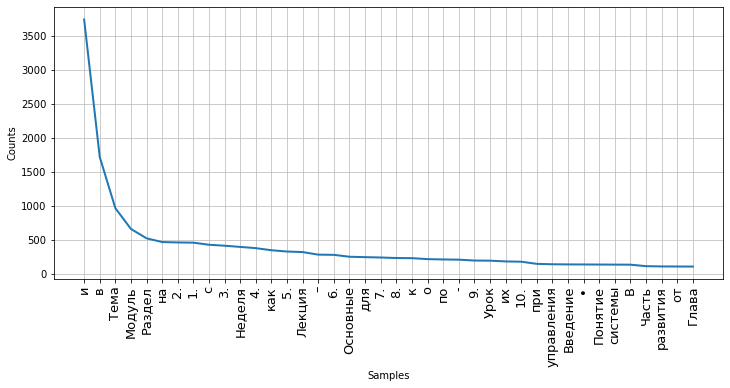

FreqDist({'и': 3750, 'в': 1720, 'Тема': 965, 'Модуль': 658, 'Раздел': 520, 'на': 465, '2.': 459, '1.': 456, 'с': 425, '3.': 411, ...})

In [190]:
def plot_most_freq_words(data, amount_of_words):
    # getting most common words
    all_words = []

    # collecting words
    for line in list(data['Содержание курса']):
        words = line.split()
        for word in words:
            all_words.append(word)

    # ploting word frequency distribution of
    # first few words
    # setting plot properties
    plt.figure(figsize=(12, 5))
    plt.xticks(fontsize=13, rotation=90)

    # creating frequency dictionary
    freq_dict = nltk.FreqDist(all_words)

    # plotting dictionary
    freq_dict.plot(amount_of_words, cumulative=False)
    
    
    return freq_dict

plot_most_freq_words(data, 40)

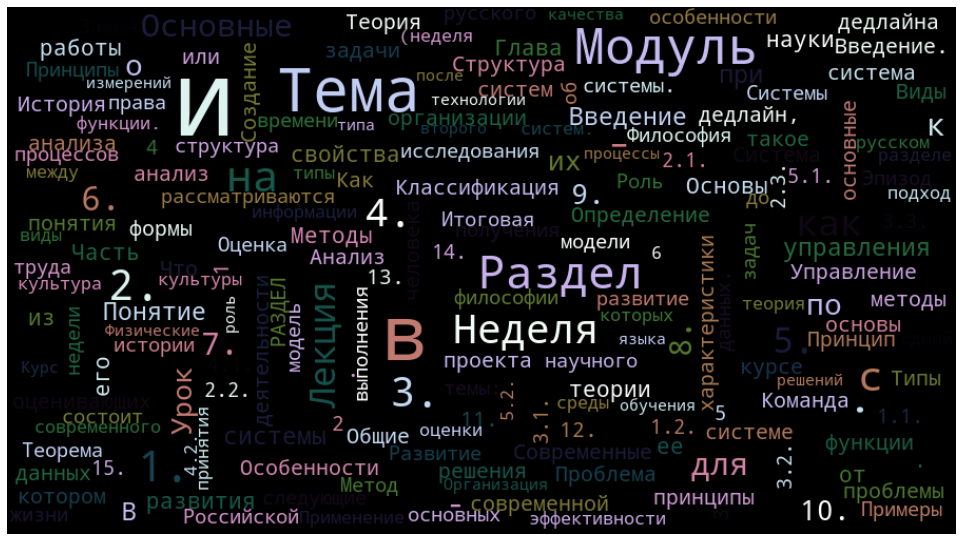

In [191]:
def plot_word_cloud(data):
    # getting most common words
    all_words = []

    # collecting words
    for line in list(data['Содержание курса']):
        words = line.split()
        for word in words:
            all_words.append(word)
            
    # creating word frequency dictionary
    word_freq = Counter(all_words)

    # drawing word cloud
    word_cloud = WordCloud(width=900,
                          height=500,
                          max_words=200,
                          max_font_size=100,
                          relative_scaling=0.5,
                          colormap='cubehelix_r',
                          normalize_plurals=True).generate_from_frequencies(word_freq)

    # setting parameters of the plot
    plt.figure(figsize=(17, 14))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    
plot_word_cloud(data)

In [192]:
def clean_puncts(text):
    return re.sub(r'\d+\.(\d+\.)?', '', text)

def clean_special(text):
    return re.sub('[\(:–-—№\).\?«»\.,;=♂/♀+→&"−\[\]#\xad•…%≤!“”■’®̆·\u200b-]', ' ', text)
    
def deleate_numbers(text):
    return re.sub(r'\b\d+\b', '', text)

# getting russian stop words
stop_words = stopwords.words('russian')

In [193]:
# lower casing data
data['Содержание курса'] = data['Содержание курса'].apply(lambda x:
                                                         ' '.join([word.lower() for word in x.split()]))

# cleaning out of punct numbers
data['Содержание курса'] = data['Содержание курса'].apply(clean_puncts)

# cleaning out of special symbold
data['Содержание курса'] = data['Содержание курса'].apply(clean_special)

# deleating number
data['Содержание курса'] = data['Содержание курса'].apply(deleate_numbers)

# cleaning out of stop words
data['Содержание курса'] = data['Содержание курса'].apply(lambda x:
                                                         ' '.join([word for word in x.split() if word not in stop_words]))

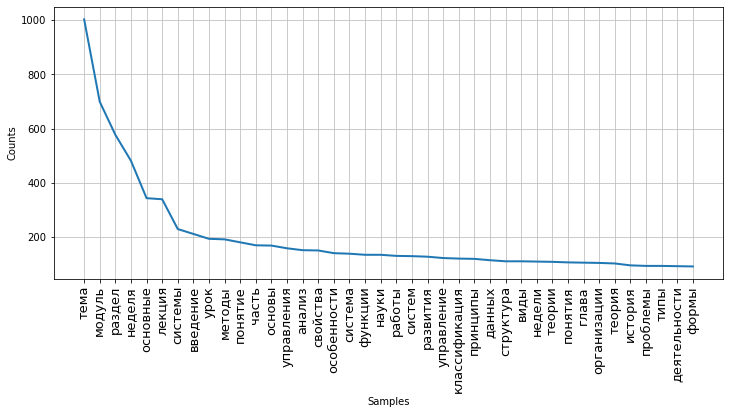

In [194]:
# plotting most frequent words after cleaning
fd = plot_most_freq_words(data, 40)

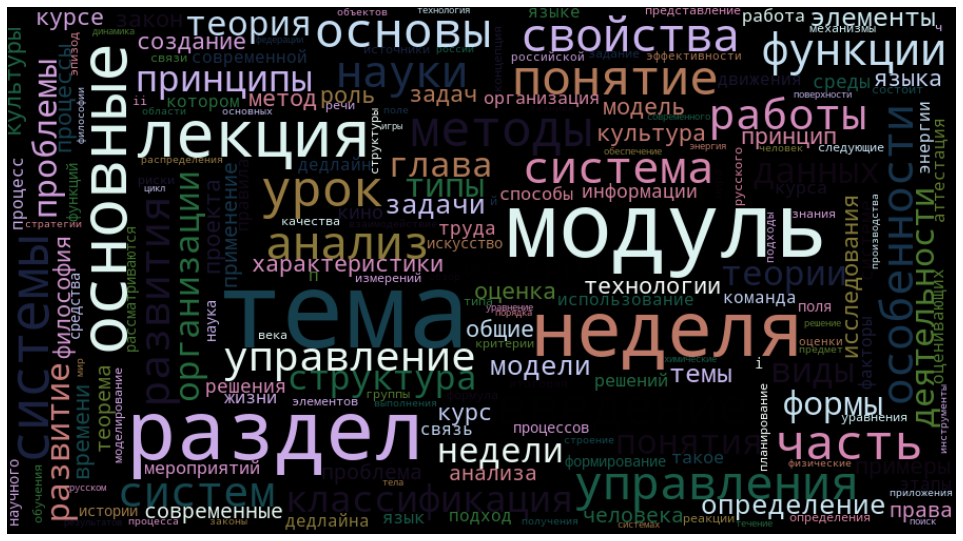

In [195]:
plot_word_cloud(data)

In [196]:
def plot_most_frequent_n_grams(data, amount_of_words, n_gram):
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(data['Содержание курса'])
    
    bag_of_words = vec.transform(data['Содержание курса'])

    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    words_freq =  words_freq[:amount_of_words]

    plt.figure(figsize=(16,5))
    plt.xticks(fontsize=15, rotation=90)

    x,y=map(list,zip(*words_freq))
    
    plt.bar(x, y)
    
    return x

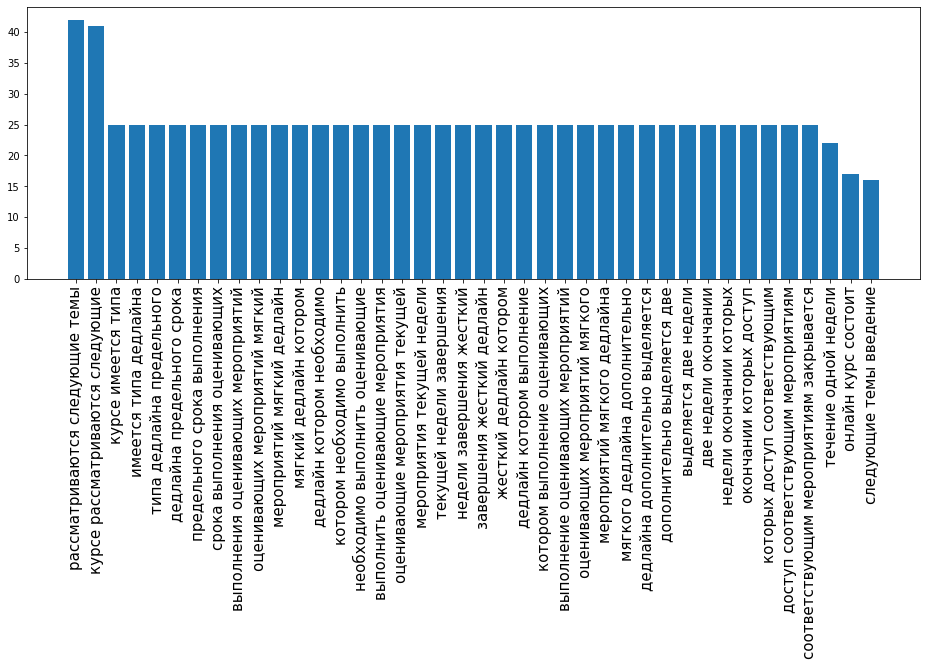

In [197]:
# plotting most frequent 3 grams
most_freq_3grams = plot_most_frequent_n_grams(data, 40, 3)

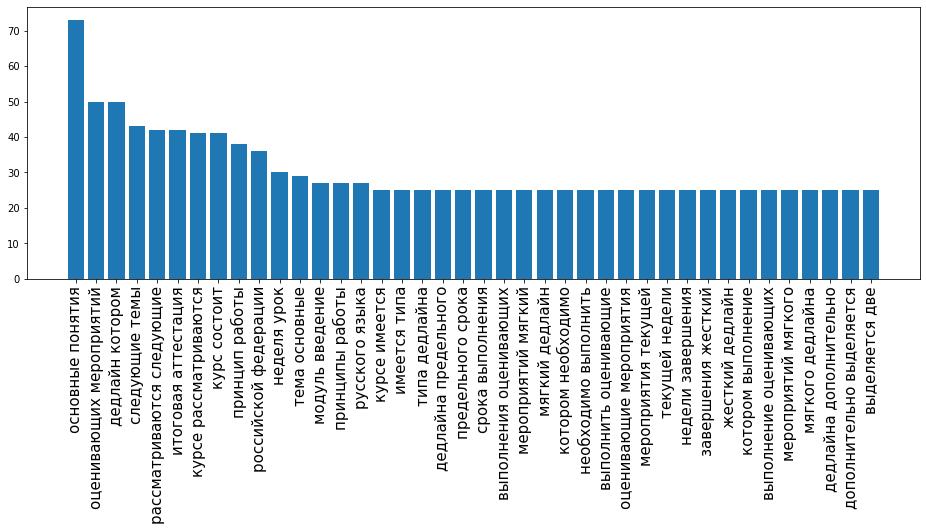

In [198]:
# plotting most frequent 2 grams
most_freq_2grams = plot_most_frequent_n_grams(data, 40, 2)

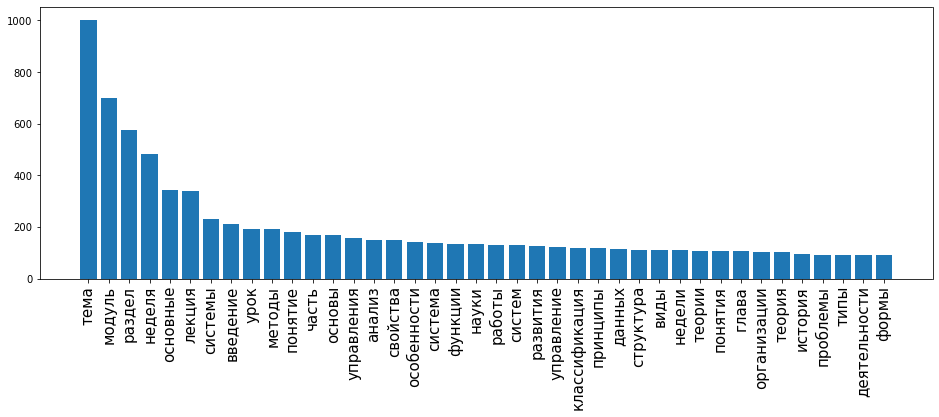

In [199]:
# plotting most frequent 1 grams
most_freq_1grams = plot_most_frequent_n_grams(data, 40, 1)

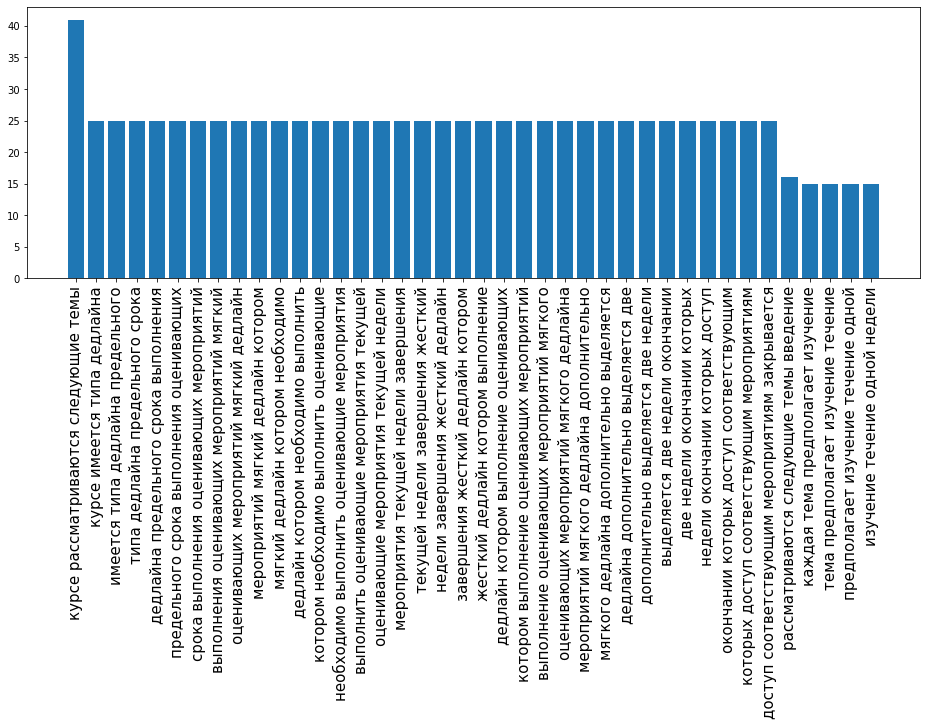

In [200]:
# plotting most frequent 4 grams
most_freq_4grams = plot_most_frequent_n_grams(data, 40, 4)

In [226]:
my_own_stop_words = most_freq_1grams[:9]

In [227]:
my_own_stop_words += most_freq_2grams[:9] + most_freq_2grams[10:13] + most_freq_2grams[15:18] + most_freq_2grams[18:40]

In [232]:
my_own_stop_words += most_freq_3grams + most_freq_4grams

In [233]:
my_own_stop_words

['тема',
 'модуль',
 'раздел',
 'неделя',
 'основные',
 'лекция',
 'системы',
 'введение',
 'урок',
 'основные понятия',
 'оценивающих мероприятий',
 'дедлайн котором',
 'следующие темы',
 'рассматриваются следующие',
 'итоговая аттестация',
 'курсе рассматриваются',
 'курс состоит',
 'принцип работы',
 'неделя урок',
 'тема основные',
 'модуль введение',
 'курсе имеется',
 'имеется типа',
 'типа дедлайна',
 'дедлайна предельного',
 'предельного срока',
 'срока выполнения',
 'выполнения оценивающих',
 'мероприятий мягкий',
 'мягкий дедлайн',
 'котором необходимо',
 'необходимо выполнить',
 'выполнить оценивающие',
 'оценивающие мероприятия',
 'мероприятия текущей',
 'текущей недели',
 'недели завершения',
 'завершения жесткий',
 'жесткий дедлайн',
 'котором выполнение',
 'выполнение оценивающих',
 'мероприятий мягкого',
 'мягкого дедлайна',
 'дедлайна дополнительно',
 'дополнительно выделяется',
 'выделяется две',
 'рассматриваются следующие темы',
 'курсе рассматриваются следующие',
 

In [234]:
# cleaning out of my own stop words
data['Содержание курса'] = data['Содержание курса'].apply(lambda x:
                                                         ' '.join([word for word in x.split() if word not in my_own_stop_words]))

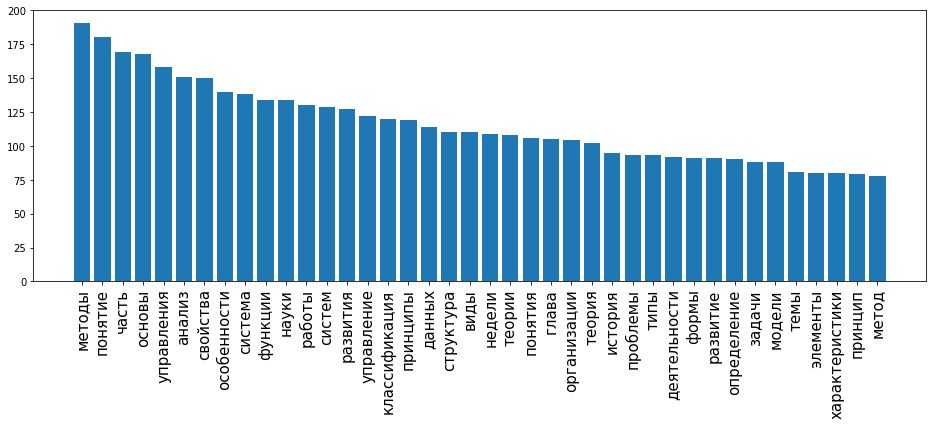

In [236]:
# plotting most frequent 1 grams
most_freq_1grams = plot_most_frequent_n_grams(data, 40, 1)